<a href="https://colab.research.google.com/github/GrainSack/GrainSack/blob/main/Likelihood_information_theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prior, likelihood, posterior

For given dataset $X$,and its distribution$P(X)$ , we want to fine best representation function \
$f : \mathcal{R}^{2} → \mathcal{R} \quad s.t \quad f(X) = aX + b = \theta^{\intercal} \pmb{X} \quad$ where as  $\theta = 
\begin{bmatrix}
a_{11} \\
b_{21} \\
\end{bmatrix} , \quad  X =\begin{bmatrix}
x \\
1 \\
\end{bmatrix} $

Note that
Probability distribution \
$P(\theta)$ : prior \
for fixed distribution of $P(\theta)$, we can find \
"**likelihood of** $\pmb{X}" := p(X = x|\theta)(=\mathcal{L}(\theta|x))$

High likelihood implies our model better representation for fixed given dataset and parameters

So, we want to training model by finding best likelihood
- **MLE(Maximun likelihood estimation)**

Remark that \
$p(\theta |X)$ for given dataset $X$ : Posterior
- We didn't know exact $P(X)$
- Thus, we didn't calculate $P(X)(posterior)$ directely
- So, we drive $P(x)$ by using prior and likelihood $⇒$ MAP(Maximum a posteriori estimation)

We want to handling joint probability of $p(X, \theta)$\
$p(X,\theta) = p(\theta|X)p(X) = p(X|\theta)p(\theta)$ $⇒ p(\theta|X) = {p(X|\theta)p(\theta)\over p(X)}$
\
(posterior = ${likelihood \times prior \over evidence} , posterior \propto likelihood \times prior)$

\


### For training dataset and target label
For input data and label : $\{(x_1 , y_1) , \dots , (x_n , y_n)\}$
, likelihood value for given $\theta , X$ = $p(Y|\theta , X)$

for singleton $y_{i}$, consider likelihood $p(y_{n} | \theta , x_{n})$, Let assume noise between f($\theta$) and Y following,\
$dist(C(f(\theta, X), Y)) \sim \mathcal{N}(0, \sigma^{2})$

then,
$p(y_{n}|\theta, x_{n}) = \mathcal{N}(y_{n}|f(\theta,X),\sigma^{2})$ = ${1 \over \sqrt{2 \pi \sigma^{2}}} exp(-{(y_{n} - f(\theta, X))^{2}\over 2 \sigma^{2}})$

Note that \

$p(y_{n}|\theta , x_n)$ has maximum value for $y_{n} = f(\theta,X)$

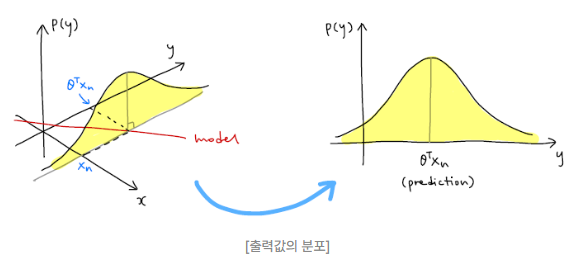

more detail about Likelihood : https://aigong.tistory.com/369

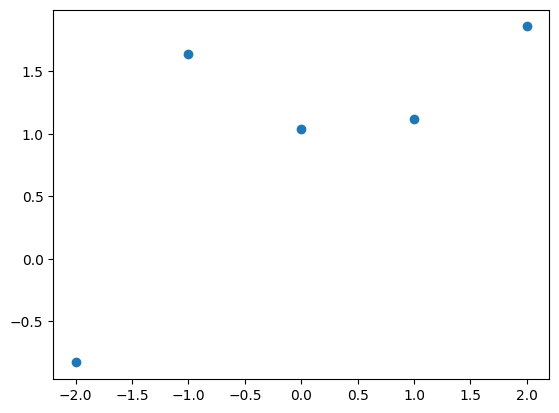

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(321)

input_data = np.linspace(-2, 2, 5)
label = input_data + 1 + np.random.normal(0, 1, size=5)

plt.scatter(input_data, label)
plt.show()

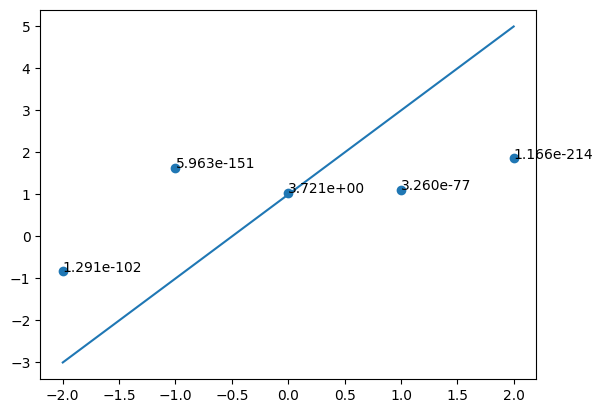

In [11]:
# model: y = ax + b

# [Playground] a, b 값을 바꾸면서 실행해보세요
#-------------------------------#
a = 2
b = 1
#-------------------------------#

# 모델 예측값
model_output = a*input_data + b
likelihood = []

# x: 입력 데이터, y: 데이터 라벨
# 예측값과 라벨의 차이를 제곱하여 exp에 사용
for x, y, output in zip(input_data, label, model_output):
    likelihood.append(1/(math.sqrt(2*math.pi*0.1*0.1))*math.exp(-pow(y-output,2)/(2*0.1*0.1)))

model_x = np.linspace(-2, 2, 50)
model_y = a*model_x + b

fig, ax = plt.subplots()
ax.scatter(input_data, label)
ax.plot(model_x, model_y)

for i, text in enumerate(likelihood):
    ax.annotate('%.3e'%text, (input_data[i], label[i]))

plt.show()

### MLE

https://www.youtube.com/watch?v=XepXtl9YKwc&t=7s


- Likelihood for whole Datasets for $i.i.d$ condition,
\
$p(Y|\theta, X) = \Pi_{n}p(y_{n}|\theta , x_{n})$
\
Taking log likelihood 
\
$log(p(Y|\theta, X)) = \Sigma_{n}log(y_{n}|\theta , x_{n}) = \Sigma_{n}log{1\over \sqrt{2 \pi \sigma^{2}}} + \Sigma_{n}(-{C(y_{n}, f(x_{n}, \theta)) \over 2 \sigma^{2} })= Const + {1 \over 2\sigma^{2}}\Sigma_{n}(-C(y_{n}, f(x_{n}, \theta)))$

\
- Thus, maximun likelihood parameter $\theta_{ML}$ is denoted as
\
$\theta_{ML} = \argmax_{\theta} log\, p(Y|\theta,X) =\argmax_{\theta}({1 \over 2\sigma^{2}}\Sigma_{n}(-C(y_{n}, f(x_{n}, \theta))) + Const ) $

\

- Take minus(-) for last eqn, then, we call it Negative log likelihood

\
- Note that for $f(X,\theta) = \theta^{\intercal}X$ and L_2 loss $C(Y,f(X,\theta)) = \Sigma_{n}(y_{n}-f(\theta, X))^{2}$ then, 
\
Partial derivative can described as :
${dC \over d\theta} = {1\over \sigma^{2}}(-Y^{\intercal}X + \theta^{\intercal}X^{\intercal}X)$

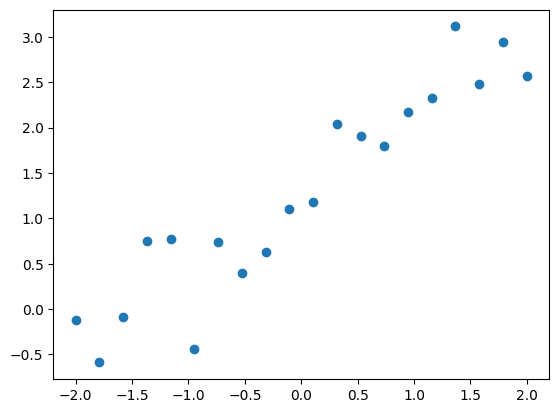

In [12]:
import math
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
num_samples = 20

input_data = np.linspace(-2, 2, num_samples)
labels = input_data + 1 + np.random.normal(0, 0.5, size=num_samples)

plt.scatter(input_data, labels)
plt.show()

In [13]:
def likelihood(labels, preds):
    result = 1/(np.sqrt(2*math.pi*0.1*0.1))*np.exp(-np.power(labels-preds,2)/(2*0.1*0.1))
    
    return np.prod(result)

def neg_log_likelihood(labels, preds):
    const_term = len(labels)*math.log(1/math.sqrt(2*math.pi*0.1*0.1))

    return (-1)*(const_term + 1/(2*0.1*0.1)*np.sum(-np.power(labels-preds,2)))

slope: 0.8578 bias: 1.2847
likelihood: 2.9724e-54
negative log likelihood: 1.2325e+02


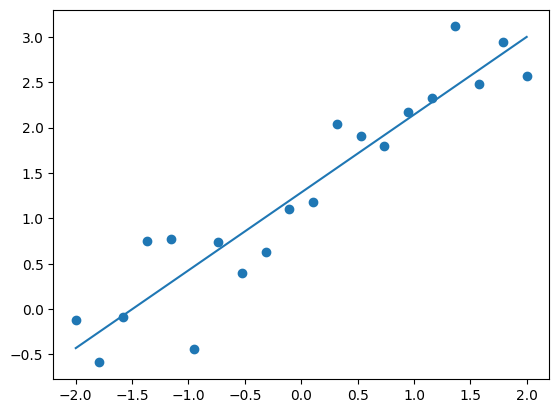

In [14]:
# X: 20x2 matrix, y: 20x1 matrix
# input_data 리스트를 column vector로 바꾼 다음 np.append 함수로 상수항을 추가합니다.
X = np.append(input_data.reshape((-1, 1)), np.ones((num_samples, 1)), axis=1)
y = labels

theta_1, theta_0 = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

print('slope: '+'%.4f'%theta_1+' bias: '+'%.4f'%theta_0)

predictions = theta_1 * input_data + theta_0
print('likelihood: '+'%.4e'%likelihood(labels, predictions))
print('negative log likelihood: '+'%.4e'%neg_log_likelihood(labels, predictions))

model_x = np.linspace(-2, 2, 50)
model_y = theta_1 * model_x + theta_0

plt.scatter(input_data, labels)
plt.plot(model_x, model_y)
plt.show()

### MAP
https://hyeongminlee.github.io/post/bnn002_mle_map/
\
https://www.youtube.com/watch?v=fVY45dhzetw

- MLE only consider dataset X and target Y
this trajectory is fast for computation, but has lower robustness for noising dataset(outlier) because MLE is fully dependent for X,Y

#### How about MAP?
- We can understand MAP is find parameter $\theta$ maximizing $p(\theta|X)$(posterior)

For supervised learning we cas describe posterior as
\
$p(\theta | X,Y) = {p(\theta,X,Y) \over p(X,Y)} = {p(X,Y|\theta)p(\theta) \over p(X,Y)} = {p(Y|\theta,X)p(X)p(\theta)\over p(Y|X)p(X)} = {p(Y|\theta,X)p(\theta)\over p(Y|X)}$
\
for given $prior: p(\theta) \,\,\, and \,\,\, likelihood \,\, p(Y|\theta,X)$
\
We give some assumption for prior $p(\theta)$
- Some times it can be good describe to maxiizing posterior($p(\theta|X)$)
- Even not, still $p(\theta) $ can handling model's output

For example, let $p(\theta) \sim \mathcal{N}(0,\alpha^{2} \mathcal{I}$) = ${1 \over 2 \pi \alpha^{2}}exp(-{1 \over 2}(\theta - 0)^{\intercal}\Sigma^{-1}(\theta -0)) = {1 \over 2 \pi \alpha^{2}}exp(-{1 \over 2 \alpha^{2}}\theta^{\intercal} \theta)$

#### Minimizing negative log posterior
 $\mathcal{L}_{neg p} = argmin_{\theta}(-log \, p(\theta|X,Y)) =argmin_{\theta}(-log \, p(Y|\theta,X) - log \, p(\theta) + log \, p(Y|X)) = {1 \over 2\sigma^{2}} \Sigma_{n}(y_{n} - \theta^{\intercal}x_{n}) +{1 \over 2\sigma^{2}}\theta^{\intercal} \theta + Const ={1 \over 2\sigma^{2}} \Sigma_{n}(y_{n} - \theta^{\intercal}x_{n}) +{1 \over 2\sigma^{2}}\lVert \theta \rVert_{2}^{2} + Const $ 

We adding last term by prior assumption and this term can understaning as L-2 regularization term

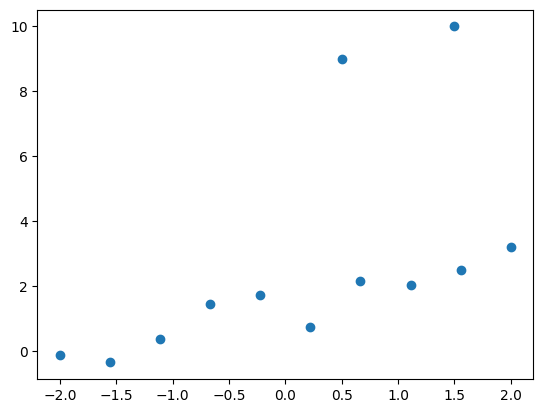

In [15]:
import math
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
num_samples = 10

input_data = np.linspace(-2, 2, num_samples)
labels = input_data + 1 + np.random.normal(0, 0.5, size=num_samples)

input_data = np.append(input_data, [0.5, 1.5])
labels = np.append(labels, [9.0, 10.0])

plt.scatter(input_data, labels)
plt.show()

In [16]:
def likelihood(labels, preds):
    result = 1/(np.sqrt(2*math.pi*0.1*0.1))*np.exp(-np.power(labels-preds,2)/(2*0.1*0.1))
    
    return np.prod(result)

def neg_log_likelihood(labels, preds):
    const_term = len(labels)*math.log(1/math.sqrt(2*math.pi*0.1*0.1))

    return (-1)*(const_term + 1/(2*0.1*0.1)*np.sum(-np.power(labels-preds,2)))

[MLE result] (blue)
slope: 1.4748 bias: 2.4784
likelihood: 0.0000e+00
negative log likelihood: 4.1298e+03

[MAP result] (orange)
slope: 1.1719 bias: 1.6628
likelihood: 0.0000e+00
negative log likelihood: 4.6645e+03


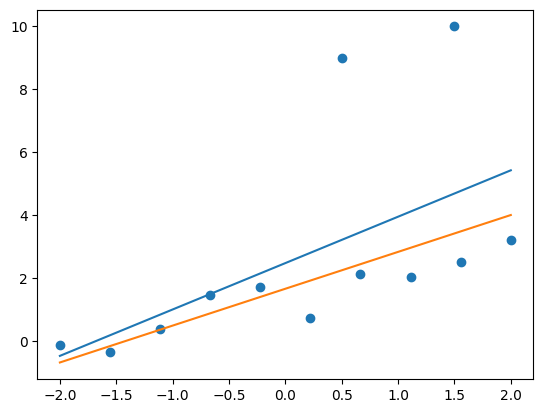

In [17]:
# X: 21x2 matrix, y: 21x1 matrix
# input_data 리스트를 column vector로 바꾼 다음 np.append 함수로 상수항을 추가합니다.
X = np.append(input_data.reshape((-1, 1)), np.ones((num_samples+2, 1)), axis=1)
y = labels

# MLE 파라미터 계산식
mle_theta_1, mle_theta_0 = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
# MAP 파라미터 계산식
map_theta_1, map_theta_0 = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)+(0.1*0.1)/(0.04*0.04)*np.eye(2)), X.T), y)

print('[MLE result] (blue)')
print('slope: '+'%.4f'%mle_theta_1+' bias: '+'%.4f'%mle_theta_0)

mle_preds = mle_theta_1 * input_data + mle_theta_0
print('likelihood: '+'%.4e'%likelihood(labels, mle_preds))
print('negative log likelihood: '+'%.4e\n'%neg_log_likelihood(labels, mle_preds))

print('[MAP result] (orange)')
print('slope: '+'%.4f'%map_theta_1+' bias: '+'%.4f'%map_theta_0)

map_preds = map_theta_1 * input_data + map_theta_0
print('likelihood: '+'%.4e'%likelihood(labels, map_preds))
print('negative log likelihood: '+'%.4e'%neg_log_likelihood(labels, map_preds))

model_x = np.linspace(-2, 2, 50)
mle_model_y = mle_theta_1 * model_x + mle_theta_0
map_model_y = map_theta_1 * model_x + map_theta_0

plt.scatter(input_data, labels)
plt.plot(model_x, mle_model_y)
plt.plot(model_x, map_model_y)
plt.show()

# Information theory

Given probability $p(X=x)$, "**Information Content**"  : $I(x) = -log_{b}p(x)$

Entropy
\
https://ko.wikipedia.org/wiki/%EC%97%94%ED%8A%B8%EB%A1%9C%ED%94%BC

Giben Dataset $X = \{x_{1},x_{2}, \dots x_{n}\}$,
Entropy $H(X)  = \mathbb{E}_{X \sim P}[I(X)] = -\Sigma_{i=1}^{n}p_{i} log\,p_{i}\quad where \,\, as \,\, p_{i} := P(X= x_{i})$
\
- Continuous version
\
$h(X) = -\int p(x) log \, p(x) \, dx$

## KL -Divergence
Measureing difference between two distributions

For given two Distribuons := $P(x), Q(x)$

$D_{KL}(P||Q) = \mathbb{E}_{X \sim P}[-log\, Q(x)] - \mathbb{E}_{X \sim P} =[-log\, P(x)] = \Sigma P(x)log({P(x) \over Q(x)})$

- Continuous ver
 $D_{KL}(P||Q) =\int P(x)log({P(x) \over Q(x)})\,dx$
- $KL divergence is not symmetric$
$D_{KL}(P||Q) \neq D_{KL}(Q||P) $
- Have positive value
- $D_{KL}(P||Q) = D_{KL}(Q||P) ↔^{iff} P = Q$
- We learning only $\pmb{Q}$ ($P$ is fixed distribution)

We optimized Kl-divergence using CrossEntropy

- $H(P,Q) = H(P) + D_{KL}(P||Q)$


In [18]:
import numpy as np
import random

# generate random output
#-----------------#
# can be modified
class_num = 4
#-----------------#
q_vector = []
total = 1

for i in range(class_num-1):
    q = random.uniform(0,total)
    q_vector.append(round(q,3))
    total = total - q

q_vector.append(total)
softmax_output = np.array(q_vector)

print(softmax_output)

[0.292      0.157      0.203      0.34793341]


In [19]:
#-----------------#
# can be modified
class_index = 1
#-----------------#

p_vector = np.zeros(class_num)
p_vector[class_index-1] = 1

cross_entropy = -np.sum(np.multiply(p_vector, np.log(softmax_output)))

print('model prediction: '+str(softmax_output))
print('data label: '+str(p_vector))
print('cross entropy: '+str(round(cross_entropy,4)))

model prediction: [0.292      0.157      0.203      0.34793341]
data label: [1. 0. 0. 0.]
cross entropy: 1.231


# Cross Entropy and Likelihood
For fixed parameter $\theta$, Model distribution is $Q(y|X,\theta)$ and real distribution is $P(y|X)$
\
$H(P,Q) = - \Sigma P(y|X)log \, Q(y|X,\theta) = \Sigma P(y|X)(-log \, Q(y|X,\theta))$
\
thus, minimize parameter for crossentropy leads optimize negative log likelihood

### Decision tree and Entropy

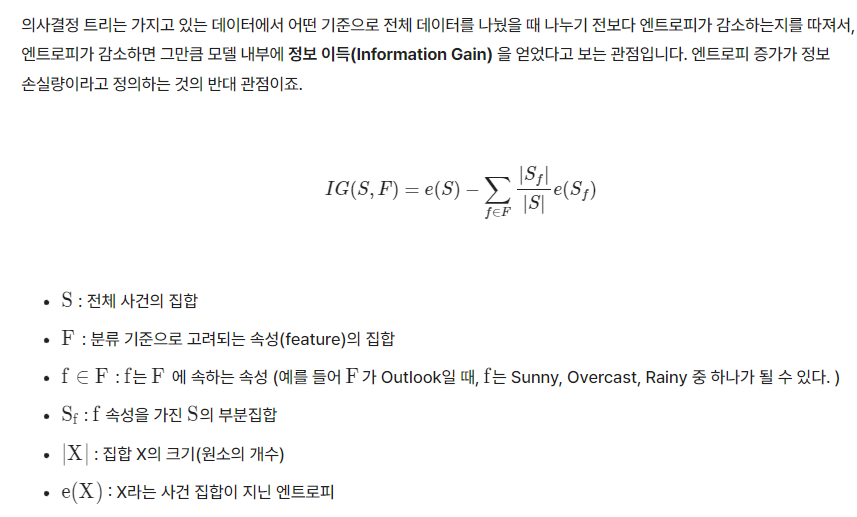

In [20]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
import os
csv_path = '/content/drive/MyDrive/AIFFEL/diabetes.csv'

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
df = pd.read_csv(csv_path, header=0, names=col_names)
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
# 데이터셋 준비
feature_cols = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']
X = df[feature_cols] # Features
y = df.label # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print('슝=3')

슝=3


In [23]:
# Decision Tree  모델 학습
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.683982683982684


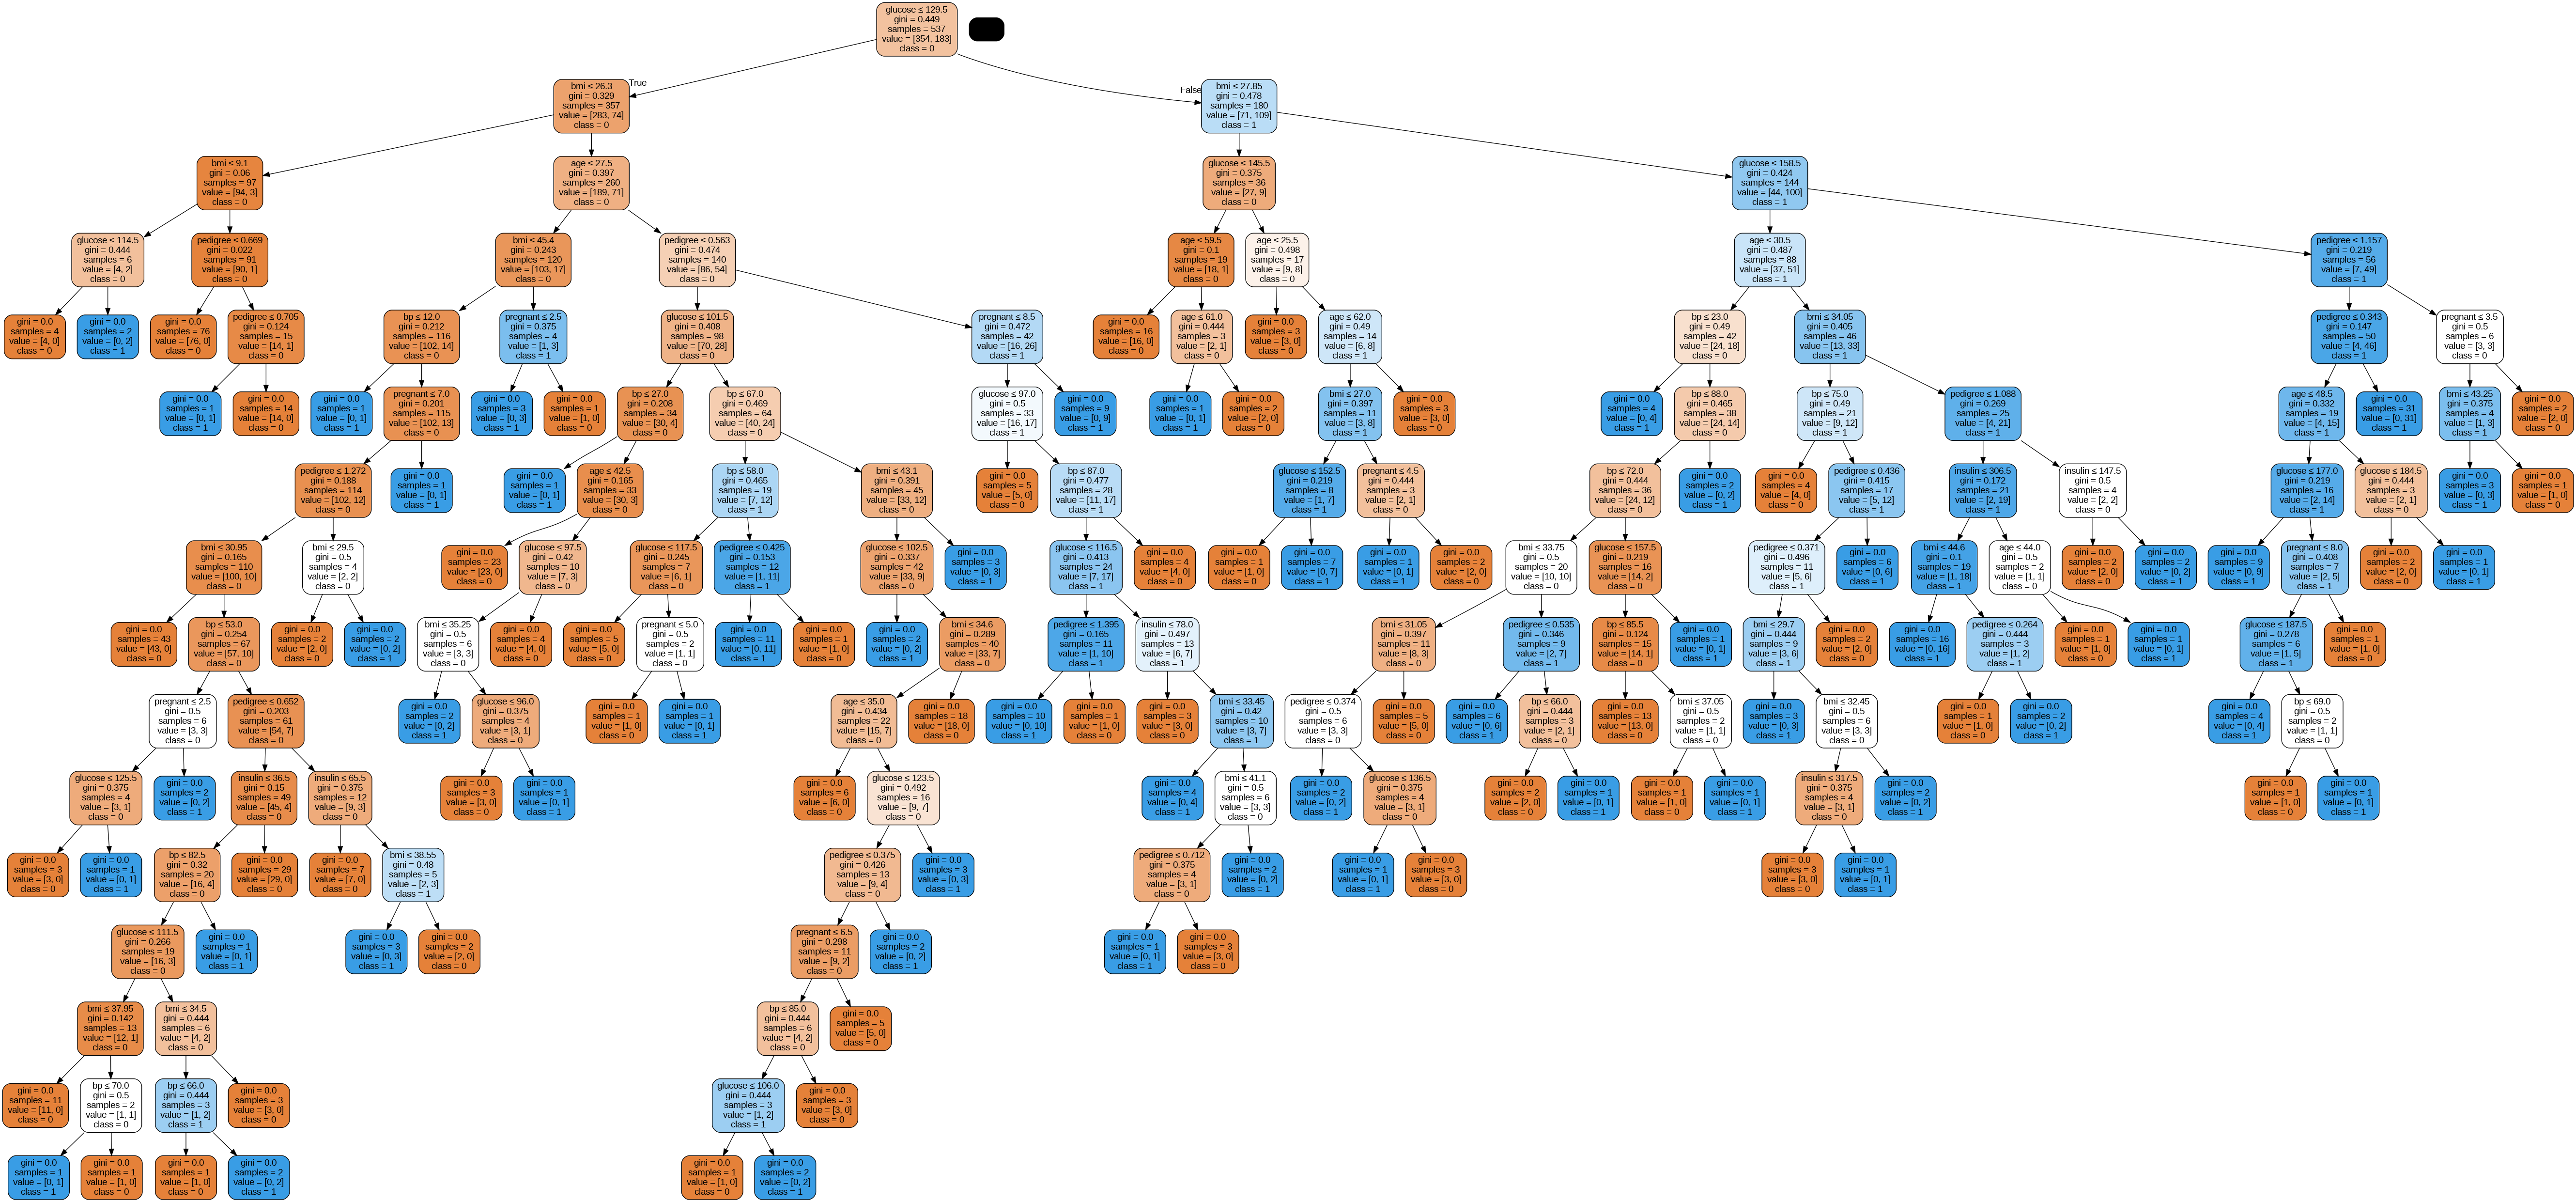

In [24]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, 
                out_file=dot_data,  
                filled=True, 
                rounded=True,
                special_characters=True, 
                feature_names=feature_cols, 
                class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes1.png')
Image(graph.create_png(), retina=True)

In [25]:
# 정보 이득이 되지 않고 남은 Impurity  총량 측정
ccp_path1 = clf.cost_complexity_pruning_path(X_train,y_train)
ccp_path2 = clf.cost_complexity_pruning_path(X_test,y_test)
print(np.mean(ccp_path1.impurities))
print(np.mean(ccp_path2.impurities))

0.15530329652426622
0.14655950416493055


In [26]:
clf = DecisionTreeClassifier(max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7575757575757576


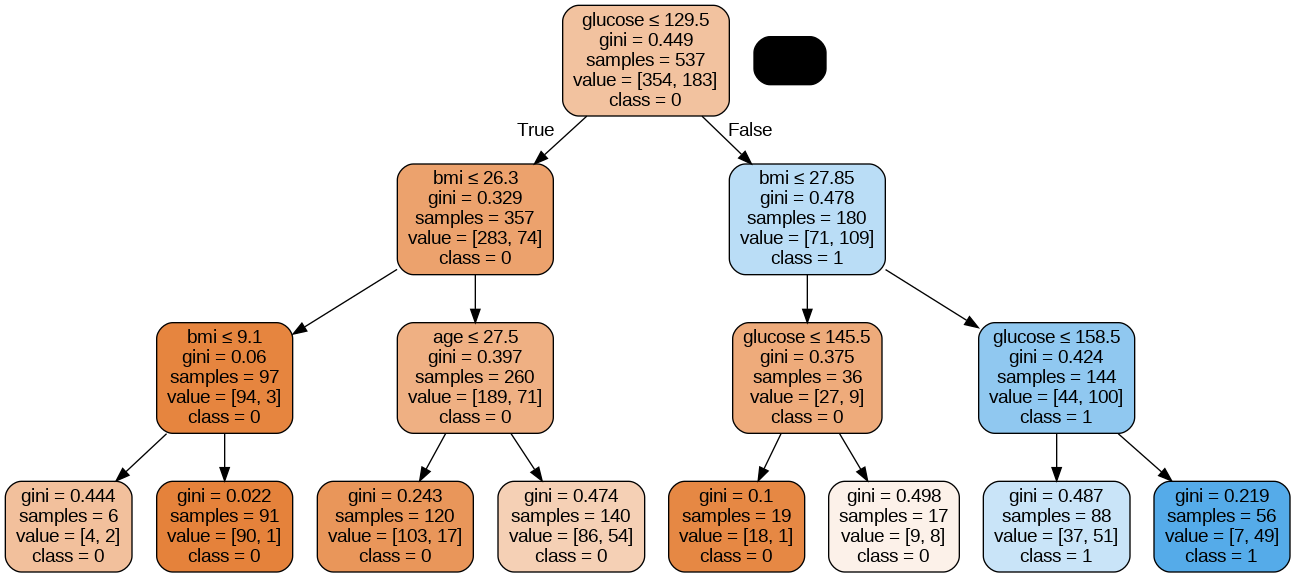

In [27]:
dot_data = StringIO()
export_graphviz(clf, 
                out_file=dot_data,  
                filled=True, 
                rounded=True,
                special_characters=True,
                feature_names = feature_cols,
                class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes2.png')
Image(graph.create_png(), retina=True)

In [28]:
# 정보이득이 되지 않고 남은 Impurity  총량 측정
ccp_path1 = clf.cost_complexity_pruning_path(X_train,y_train)
ccp_path2 = clf.cost_complexity_pruning_path(X_test,y_test)
print(np.mean(ccp_path1.impurities))
print(np.mean(ccp_path2.impurities))

0.3488385063866954
0.30877554783402966
